In [36]:
import pandas as pd
import numpy as np
import groups_cols
from matplotlib import pyplot as plt
tables = {}

# Mean and std tables

In [37]:
iqr = pd.read_csv('IQR.csv', sep=';')

In [38]:
iqr.head()

,Unnamed: 0,ACP,pol,q3,q1,median,IQR,mean,std,count
0,0,all,POLICIES_buy,0.0,0.0,0.0,0.0,0.036194,0.186773,250592.0
1,1,all,POLICIES_rent,1.0,0.0,0.0,1.0,0.310333,0.462630,250070.0
2,2,all,POLICIES_wage,1.0,0.0,0.0,1.0,0.329212,0.469927,250015.0
3,3,all,POLICIES_no_policy,0.0,0.0,0.0,0.0,0.178652,0.383060,249323.0
4,4,PROCESSING_ACPS_BELO HORIZONTE,POLICIES_buy,0.0,0.0,0.0,0.0,0.094223,0.292138,5487.0


In [39]:
iqr.loc[(iqr['ACP'] == 'all') & (iqr['pol'] == 'POLICIES_buy')]['mean'].values[0]

0.0361942919167411

In [40]:
mean_policy_acp = pd.DataFrame(columns=[['MR', 'No policy', 'Buy', 'Rent', 'Wage']])
std_policy_acp = mean_policy_acp.copy()
acps = ['all'] + groups_cols.abm_dummies['acps']

for acp in acps:
    row_mean = [acp]
    row_std = row_mean.copy()
    for policy in ['POLICIES_no_policy','POLICIES_buy', 'POLICIES_rent', 'POLICIES_wage']:
        dataframe_mean = iqr.loc[(iqr['ACP'] == acp) & (iqr['pol'] == policy)]['mean'].values[0]
        dataframe_std = iqr.loc[(iqr['ACP'] == acp) & (iqr['pol'] == policy)]['std'].values[0]
        if policy == 'POLICIES_no_policy':
            mean = dataframe_mean.round(decimals=4)*100
            std = dataframe_std.round(decimals=4)*100
        else:
            mean = (dataframe_mean.round(decimals=4)*100-row_mean[1])
            std = (dataframe_std.round(decimals=4)*100-row_std[1])
        row_mean.append(mean)
        row_std.append(std)
    mean_policy_acp.at[acp] = row_mean
    std_policy_acp.at[acp] = row_std

for df in [mean_policy_acp, std_policy_acp]:
    df.reset_index(drop=True, inplace=True)
    df.sort_values(ascending=False, by=('No policy',), inplace=True)
    df.replace({('MR',): groups_cols.abm_dummies_show})

mean_policy_acp = mean_policy_acp.replace({('MR',): groups_cols.abm_dummies_show})
std_policy_acp = std_policy_acp.replace({('MR',): groups_cols.abm_dummies_show})

In [41]:
mean_policy_acp

,MR,No policy,Buy,Rent,Wage
1,Belo Horizonte,100.0,-90.58,0.0,0.0
7,São Paulo,29.84,-1.14,-0.9,7.23
44,Rio de Janeiro,27.38,-0.12,1.11,1.33
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
41,Pelotas,18.58,-15.81,10.24,10.71
15,João Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringá,18.14,-14.33,10.16,10.86
42,Petrolina-Juazeiro,18.11,-13.97,9.16,9.25


In [42]:
std_policy_acp

,MR,No policy,Buy,Rent,Wage
7,São Paulo,45.75,-0.51,-0.4,2.55
44,Rio de Janeiro,44.59,-0.06,0.55,0.65
8,Joinville,39.56,-17.41,4.89,5.51
9,Campo Grande,38.94,-20.3,6.27,5.73
41,Pelotas,38.9,-22.48,6.39,6.61
15,João Pessoa,38.8,-19.95,6.38,5.82
17,Maceio,38.78,-20.74,6.25,6.25
22,Maringá,38.54,-19.39,6.51,6.84
42,Petrolina-Juazeiro,38.51,-18.59,6.02,6.07
34,Crato,38.35,-22.82,6.42,6.78


### No policy is in absolute value (%) and all other columns are in percentage points of difference to the No policy case. NH-SL: Novo Hamburgo/Sao Leopoldo, SJRP: Sao Jose do Rio Preto, SJC: Sao Jose dos Campos

# Differences in dummies

In [43]:
current = pd.read_csv('../pre_processed_data/counting_Current.csv', sep=';').round(decimals=4)
current.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)

In [44]:
current

,Unnamed: 0,size,optimal,non-optimal
0,Policy: buy,0.1219,0.0259,0.9741
1,Policy: rent,0.1219,0.1037,0.8963
2,Policy: wage,0.1219,0.1393,0.8607
3,Policy: none,0.6343,0.0391,0.9609
4,Interest: fixed,0.0019,0.0000,1.0000
...,...,...,...,...
57,Jan. 2010,0.9924,0.0580,0.9420
58,FPM: False,0.0038,0.0000,1.0000
59,FPM: True,0.9962,0.0578,0.9422
60,Alternative0: False,0.0038,0.0000,1.0000


In [45]:
tree = pd.read_csv('../pre_processed_data/counting_Tree.csv', sep=';').round(decimals=4)
tree.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)

## differences in non-acp dummies

In [46]:
SON = pd.DataFrame()
SON_acp = SON.copy()
non_acps = list(range(0,7)) + list(range(36, 45))

In [47]:
for row in non_acps:
    to_add = {'Dummy' : tree.iloc[row, 0],
              'Size: sur': tree.iloc[row, 1]*100,
              'Size: ABM': current.iloc[row, 1]*100,
              'Opt: sur': tree.iloc[row, 2]*100,
              'Opt: ABM': current.iloc[row, 2]*100,
              'Non-opt: sur': tree.iloc[row, 3]*100,
              'Non-opt: ABM': current.iloc[row, 3]*100
    }
    print(to_add)
    SON = SON.append(to_add, ignore_index=True)

{'Dummy': 'Policy: buy', 'Size: sur': 25.06, 'Size: ABM': 12.19, 'Opt: sur': 3.62, 'Opt: ABM': 2.59, 'Non-opt: sur': 96.38, 'Non-opt: ABM': 97.41}
{'Dummy': 'Policy: rent', 'Size: sur': 25.009999999999998, 'Size: ABM': 12.19, 'Opt: sur': 31.03, 'Opt: ABM': 10.37, 'Non-opt: sur': 68.97, 'Non-opt: ABM': 89.63}
{'Dummy': 'Policy: wage', 'Size: sur': 25.0, 'Size: ABM': 12.19, 'Opt: sur': 32.92, 'Opt: ABM': 13.930000000000001, 'Non-opt: sur': 67.08, 'Non-opt: ABM': 86.07000000000001}
{'Dummy': 'Policy: none', 'Size: sur': 24.93, 'Size: ABM': 63.43, 'Opt: sur': 17.87, 'Opt: ABM': 3.91, 'Non-opt: sur': 82.13000000000001, 'Non-opt: ABM': 96.09}
{'Dummy': 'Interest: fixed', 'Size: sur': 33.35, 'Size: ABM': 0.19, 'Opt: sur': 21.37, 'Opt: ABM': 0.0, 'Non-opt: sur': 78.63, 'Non-opt: ABM': 100.0}
{'Dummy': 'Interest: real', 'Size: sur': 33.33, 'Size: ABM': 99.62, 'Opt: sur': 21.37, 'Opt: ABM': 5.779999999999999, 'Non-opt: sur': 78.63, 'Non-opt: ABM': 94.22}
{'Dummy': 'Interest: nominal', 'Size: sur

In [48]:
SON.sort_values(by='Non-opt: sur', inplace=True)

In [49]:
SON

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
12,Curitiba,2.15,1.06,46.99,47.86,53.01,52.14
2,Policy: wage,25.00,12.19,32.92,13.93,67.08,86.07
1,Policy: rent,25.01,12.19,31.03,10.37,68.97,89.63
4,Interest: fixed,33.35,0.19,21.37,0.00,78.63,100.00
5,Interest: real,33.33,99.62,21.37,5.78,78.63,94.22
6,Interest: nominal,33.32,0.19,21.32,0.00,78.68,100.00
8,Campina Grande,2.16,1.06,19.29,0.00,80.71,100.00
13,Florianópolis,2.18,1.06,19.18,0.00,80.82,100.00
11,Crato,2.18,1.06,19.07,0.00,80.93,100.00
10,Caxias do Sul,2.18,1.06,18.94,0.00,81.06,100.00


## differences in acp dummies

In [50]:
for row in range(7,36):
    to_add = {'Dummy' : tree.iloc[row, 0],
              'Size: sur': tree.iloc[row, 1]*100,
              'Size: ABM': current.iloc[row, 1]*100,
              'Opt: sur': tree.iloc[row, 2]*100,
              'Opt: ABM': current.iloc[row, 2]*100,
              'Non-opt: sur': tree.iloc[row, 3]*100,
              'Non-opt: ABM': current.iloc[row, 3]*100
    }
    print(to_add)
    SON_acp = SON_acp.append(to_add, ignore_index=True)

{'Dummy': 'Belo Horizonte', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 77.06, 'Opt: ABM': 81.08, 'Non-opt: sur': 22.939999999999998, 'Non-opt: ABM': 18.92}
{'Dummy': 'Fortaleza', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 17.95, 'Opt: ABM': 3.15, 'Non-opt: sur': 82.05, 'Non-opt: ABM': 96.85000000000001}
{'Dummy': 'Porto Alegre', 'Size: sur': 2.1999999999999997, 'Size: ABM': 2.0, 'Opt: sur': 10.52, 'Opt: ABM': 0.0, 'Non-opt: sur': 89.48, 'Non-opt: ABM': 100.0}
{'Dummy': 'Campinas', 'Size: sur': 2.18, 'Size: ABM': 2.0, 'Opt: sur': 41.010000000000005, 'Opt: ABM': 32.879999999999995, 'Non-opt: sur': 58.989999999999995, 'Non-opt: ABM': 67.12}
{'Dummy': 'Salvador', 'Size: sur': 2.17, 'Size: ABM': 1.06, 'Opt: sur': 18.27, 'Opt: ABM': 11.110000000000001, 'Non-opt: sur': 81.73, 'Non-opt: ABM': 88.89}
{'Dummy': 'Recife', 'Size: sur': 2.17, 'Size: ABM': 1.06, 'Opt: sur': 18.92, 'Opt: ABM': 0.0, 'Non-opt: sur': 81.08, 'Non-opt: ABM': 100.0}
{'Dummy': 'São Paulo', 'Size: sur': 2.19, 'Si

In [51]:
SON_acp.sort_values(by='Non-opt: sur', inplace=True)

In [52]:
SON_acp

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
0,Belo Horizonte,2.17,2.00,77.06,81.08,22.94,18.92
3,Campinas,2.18,2.00,41.01,32.88,58.99,67.12
6,São Paulo,2.19,1.06,31.10,100.00,68.90,0.00
24,Belém,2.18,1.06,26.49,21.37,73.51,78.63
7,Joinville,2.16,0.30,19.99,0.00,80.01,100.00
21,Maringá,2.16,1.06,19.90,0.00,80.10,100.00
16,Maceio,2.16,1.06,19.66,0.00,80.34,100.00
8,Campo Grande,2.15,1.06,19.54,0.00,80.46,100.00
14,João Pessoa,2.18,1.06,19.52,0.00,80.48,100.00
20,Uberlandia,2.18,1.06,19.43,0.00,80.57,100.00


# Comparison of parameters

In [53]:
comp = pd.read_csv('../pre_processed_data/parameters_comparison.csv', sep=';').round(decimals=4)
comp.replace({'Unnamed: 0': groups_cols.abm_params_show}, inplace=True)
comp

,Unnamed: 0,simulated_optimal,ml_optimal,difference
0,Hiring sample size,0.0026,0.0004,0.0021
1,Hiring sample size,0.0044,0.0017,0.0027
2,Loan/permament income ratio,0.0022,0.0008,0.0014
3,Markup,-0.0000,-0.0002,0.0002
4,Maximum Loan-to-Value,0.0022,0.0003,0.0019
5,Municipal efficiency management,-0.0007,-0.0008,0.0001
6,Neighborhood effect,-0.0468,-0.0014,-0.0454
7,supply-demand effect on real estate prices,0.0000,-0.0005,0.0005
8,% firms analyze commute distance,-0.0088,-0.0055,-0.0032
9,% of population,-0.2009,-0.4203,0.2194


In [54]:
params = pd.DataFrame()
for row in range(0,len(comp['Unnamed: 0'])):
    to_add = {'Dummy' : comp.iloc[row, 0],
              'Surrogate': comp.iloc[row, 1]*100,
              'ABM': comp.iloc[row, 2]*100,
              'Difference (p.p.)': comp.iloc[row, 2]*100 - comp.iloc[row, 1]*100
    }
    print(to_add)
    params = params.append(to_add, ignore_index=True)

{'Dummy': 'Hiring sample size', 'Surrogate': 0.26, 'ABM': 0.04, 'Difference (p.p.)': -0.22}
{'Dummy': 'Hiring sample size', 'Surrogate': 0.44, 'ABM': 0.16999999999999998, 'Difference (p.p.)': -0.27}
{'Dummy': 'Loan/permament income ratio', 'Surrogate': 0.22, 'ABM': 0.08, 'Difference (p.p.)': -0.14}
{'Dummy': 'Markup', 'Surrogate': -0.0, 'ABM': -0.02, 'Difference (p.p.)': -0.02}
{'Dummy': 'Maximum Loan-to-Value', 'Surrogate': 0.22, 'ABM': 0.03, 'Difference (p.p.)': -0.19}
{'Dummy': 'Municipal efficiency management', 'Surrogate': -0.06999999999999999, 'ABM': -0.08, 'Difference (p.p.)': -0.010000000000000009}
{'Dummy': 'Neighborhood effect', 'Surrogate': -4.68, 'ABM': -0.13999999999999999, 'Difference (p.p.)': 4.54}
{'Dummy': 'supply-demand effect on real estate prices', 'Surrogate': 0.0, 'ABM': -0.05, 'Difference (p.p.)': -0.05}
{'Dummy': '% firms analyze commute distance', 'Surrogate': -0.88, 'ABM': -0.5499999999999999, 'Difference (p.p.)': 0.33000000000000007}
{'Dummy': '% of populatio

In [55]:
params.sort_values(by='Difference (p.p.)', inplace=True)

In [56]:
params

,Dummy,Surrogate,ABM,Difference (p.p.)
9,% of population,-20.09,-42.03,-21.94
16,Productivity: exponent,0.33,0.03,-0.30
1,Hiring sample size,0.44,0.17,-0.27
21,Tax over estate transactions,0.27,0.02,-0.25
0,Hiring sample size,0.26,0.04,-0.22
4,Maximum Loan-to-Value,0.22,0.03,-0.19
2,Loan/permament income ratio,0.22,0.08,-0.14
15,Cost of private transit,-0.00,-0.09,-0.09
7,supply-demand effect on real estate prices,0.00,-0.05,-0.05
3,Markup,-0.00,-0.02,-0.02


In [57]:
tables.update({'mean_policy_acp': mean_policy_acp,
               'std_policy_acp': std_policy_acp,
               "SON" : SON,
               "SON_acp" : SON_acp,
               "params" : params})

In [58]:
for _ in tables:
    table = tables[_]
    print(table.to_latex(index=False))
    name = 'table_csvs/' + _ + '.csv'
    table.to_csv(name, index=False, sep=';')

\begin{tabular}{lllll}
\toprule
                MR & No policy &    Buy &   Rent &   Wage \\
\midrule
    Belo Horizonte &     100.0 & -90.58 &    0.0 &    0.0 \\
         São Paulo &     29.84 &  -1.14 &   -0.9 &   7.23 \\
    Rio de Janeiro &     27.38 &  -0.12 &   1.11 &   1.33 \\
         Joinville &     19.43 & -14.26 &   7.67 &   8.91 \\
      Campo Grande &     18.63 & -15.02 &  10.02 &   8.91 \\
           Pelotas &     18.58 & -15.81 &  10.24 &  10.71 \\
       João Pessoa &     18.47 & -14.78 &  10.11 &   8.97 \\
            Maceio &     18.43 & -15.06 &   9.84 &   9.83 \\
           Maringá &     18.14 & -14.33 &  10.16 &  10.86 \\
Petrolina-Juazeiro &     18.11 & -13.97 &   9.16 &   9.25 \\
             Crato &     17.92 & -15.45 &   9.81 &  10.55 \\
  Feira de Santana &     17.88 &  -14.9 &  10.29 &   9.08 \\
               all &     17.87 & -14.25 &  13.16 &  15.05 \\
            Cuiabá &     17.59 & -14.91 &   10.7 &  10.21 \\
        Uberlandia &     17.57 & -13.62 &  1

# Creating the histogram for the mean and standard deviations per MR

In [59]:
mean_policy_acp

,MR,No policy,Buy,Rent,Wage
1,Belo Horizonte,100.0,-90.58,0.0,0.0
7,São Paulo,29.84,-1.14,-0.9,7.23
44,Rio de Janeiro,27.38,-0.12,1.11,1.33
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
41,Pelotas,18.58,-15.81,10.24,10.71
15,João Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringá,18.14,-14.33,10.16,10.86
42,Petrolina-Juazeiro,18.11,-13.97,9.16,9.25


In [60]:
hist_mean = mean_policy_acp.copy()
hist_std = std_policy_acp.copy()

for col in ['Buy', 'Rent', 'Wage']:
    hist_mean[col] = mean_policy_acp.loc[:,['No policy',col]].sum(axis=1)
    hist_std[col] = std_policy_acp.loc[:,['No policy',col]].sum(axis=1)

In [61]:
hist_mean

,MR,No policy,Buy,Rent,Wage
1,Belo Horizonte,100.0,9.42,100.00,100.00
7,São Paulo,29.84,28.70,28.94,37.07
44,Rio de Janeiro,27.38,27.26,28.49,28.71
8,Joinville,19.43,5.17,27.10,28.34
9,Campo Grande,18.63,3.61,28.65,27.54
41,Pelotas,18.58,2.77,28.82,29.29
15,João Pessoa,18.47,3.69,28.58,27.44
17,Maceio,18.43,3.37,28.27,28.26
22,Maringá,18.14,3.81,28.30,29.00
42,Petrolina-Juazeiro,18.11,4.14,27.27,27.36


In [62]:
hist_std.sort_values(by=('MR',), inplace=True)
hist_mean.sort_values(by=('MR',), inplace=True)

In [63]:
hist_mean

,MR,No policy,Buy,Rent,Wage
30,Aracaju,15.87,1.90,27.80,27.60
1,Belo Horizonte,100.0,9.42,100.00,100.00
25,Belém,8.0,0.00,27.12,69.69
29,Brasília,0.0,0.00,0.00,0.00
31,Campina Grande,16.96,2.23,29.88,28.11
4,Campinas,0.94,0.00,64.50,98.47
9,Campo Grande,18.63,3.61,28.65,27.54
32,Campos,15.83,2.07,28.89,27.56
33,Caxias do Sul,15.71,2.65,29.17,27.60
34,Crato,17.92,2.47,27.73,28.47


In [64]:
hist_std

,MR,No policy,Buy,Rent,Wage
30,Aracaju,36.54,13.67,44.80,44.70
1,Belo Horizonte,0.0,29.21,0.00,0.00
25,Belém,27.12,0.00,44.46,45.96
29,Brasília,0.0,0.00,0.00,0.00
31,Campina Grande,37.53,14.78,45.77,44.95
4,Campinas,9.63,0.00,47.85,12.27
9,Campo Grande,38.94,18.64,45.21,44.67
32,Campos,36.5,14.25,45.32,44.68
33,Caxias do Sul,36.39,16.07,45.45,44.70
34,Crato,38.35,15.53,44.77,45.13


In [65]:
len(hist_std.iloc[:,0])

47

In [67]:
no_policy, buy, rent, wage = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
_dict = {'No policy' : no_policy,
        'Buy' : buy,
        'Rent' : rent,
        'Wage' : wage}

for acp in range(0,len(hist_std.iloc[:,0])):
    for policy in ['No policy', 'Buy', 'Rent', 'Wage']:
        row = {'MR' : hist_mean.loc[acp, 'MR'].MR,
               'max' : min(100,hist_mean.loc[acp, policy].values[0] + hist_std.loc[acp, policy].values[0]),
               'value' : hist_mean.loc[acp, policy].values[0],
               'min' : max(0,hist_mean.loc[acp, policy].values[0] - hist_std.loc[acp, policy].values[0])}
        print(row)
        _dict[policy] = _dict[policy].append(row, ignore_index=True)

{'MR': 'all', 'max': 56.18000000000001, 'value': 17.87, 'min': 0}
{'MR': 'all', 'max': 22.3, 'value': 3.620000000000001, 'min': 0}
{'MR': 'all', 'max': 77.28999999999999, 'value': 31.03, 'min': 0}
{'MR': 'all', 'max': 79.91, 'value': 32.92, 'min': 0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Belo Horizonte', 'max': 38.63, 'value': 9.420000000000002, 'min': 0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Fortaleza', 'max': 48.68, 'value': 13.99, 'min': 0}
{'MR': 'Fortaleza', 'max': 12.09, 'value': 1.1999999999999993, 'min': 0}
{'MR': 'Fortaleza', 'max': 73.27, 'value': 28.249999999999996, 'min': 0}
{'MR': 'Fortaleza', 'max': 72.71000000000001, 'value': 27.87, 'min': 0}
{'MR': 'Porto Alegre', 'max': 25.610000000000003, 'value': 4.62, 'min': 0}
{'MR': 'Porto Alegre', 'max': 4.029999999999999, 'value': 0.15000000000000036, 'min': 0}
{'MR': 'Porto Alegre', 'max':

In [68]:
_dict['Wage'].transpose()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
MR,all,Belo Horizonte,Fortaleza,Porto Alegre,Campinas,Salvador,Recife,São Paulo,Joinville,Campo Grande,...,Goiânia,Juiz de Fora,Macapá,Natal,Pelotas,Petrolina-Juazeiro,Ribeirão Preto,Rio de Janeiro,Santos,Volta Redonda
max,79.91,100.0,72.71,57.98,100.0,73.88,72.47,85.37,73.41,72.21,...,73.36,71.85,73.66,73.21,74.8,71.94,73.26,73.95,73.33,73.8
value,32.92,100.0,27.87,18.86,98.47,28.66,27.71,37.07,28.34,27.54,...,28.31,27.3,28.51,28.21,29.29,27.36,28.24,28.71,28.29,28.61
min,0.0,100.0,0.0,0.0,86.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


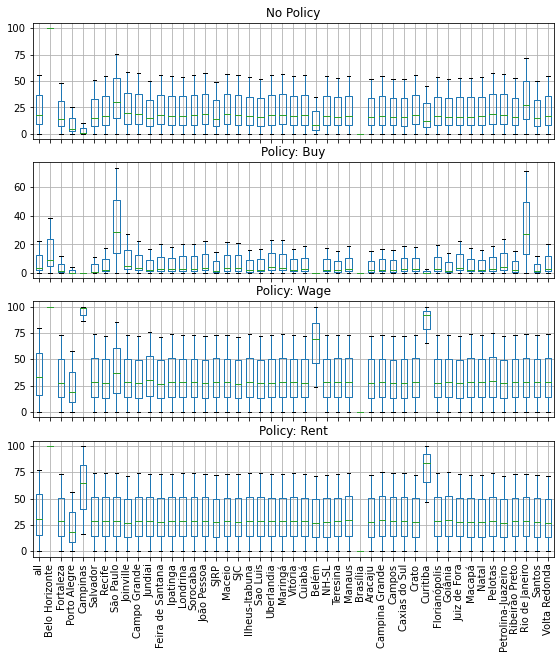

In [69]:
plt.figure(figsize=(8, 8))
plt.ylim((0, 100))
plt.tight_layout()

plt.subplot(4, 1, 1).set_title('No Policy')
_dict['No policy'].set_index('MR').T.boxplot(widths = 0.6, labels=None).set(xticklabels=[])

plt.subplot(4, 1, 2).set_title('Policy: Buy')
_dict['Buy'].set_index('MR').T.boxplot(widths = 0.6).set(xticklabels=[])

plt.subplot(4, 1, 3).set_title('Policy: Wage')
_dict['Wage'].set_index('MR').T.boxplot(widths = 0.6).set(xticklabels=[])

plt.subplot(4, 1, 4).set_title('Policy: Rent')
_dict['Rent'].set_index('MR').T.boxplot(widths = 0.6)

plt.xticks(rotation=90)


plt.savefig(f'../text/figures/boxplot.png', bbox_inches='tight', transparent=True)
plt.show()